<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/R/Sesion7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de Clasificación** Deseamos en el siguiente problema, predecir si una palanquilla (Barra) será una barra perdida (Reventón) o no (no Reventón)

In [1]:
#Leer un archivo .csv, en este caso agregarmos la liga de github que contiene esta tabla y renombrarla como df
df <- read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/Clasificacion_Test.csv")
head(df)

,Temp_SalidaHr,Torque_S6,Diametro_S12,Temp_S5,Torque_S12,Diametro_S18,Torque_S18,Temp_Bobinadora,Barra_Perdida
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1227,60,0.20,500,167,5.53,70,1198,0
2,1207,67,1.27,500,162,5.12,70,1198,0
3,1227,60,0.68,500,145,4.44,70,1198,0
4,1204,61,0.96,500,157,4.78,70,1198,0
5,1200,55,1.08,500,153,4.89,70,1198,0
6,1179,57,1.24,500,153,4.51,70,1198,0


Veamos como está su estructura a través de la función **str** en este caso para Barra Perdida: **0** es no ocurrió reventón **1** si ocurrió reventón

In [2]:
str(df)

'data.frame':	20019 obs. of  9 variables:
 $ Temp_SalidaHr  : int  1227 1207 1227 1204 1200 1179 1218 1215 1201 1198 ...
 $ Torque_S6      : int  60 67 60 61 55 57 64 55 64 60 ...
 $ Diametro_S12   : num  0.2 1.27 0.68 0.96 1.08 1.24 0.72 1 0.98 1.11 ...
 $ Temp_S5        : int  500 500 500 500 500 500 500 500 500 500 ...
 $ Torque_S12     : int  167 162 145 157 153 153 147 144 154 152 ...
 $ Diametro_S18   : num  5.53 5.12 4.44 4.78 4.89 4.51 4.08 4.36 3.5 4.56 ...
 $ Torque_S18     : int  70 70 70 70 70 70 70 70 70 70 ...
 $ Temp_Bobinadora: int  1198 1198 1198 1198 1198 1198 1198 1198 1198 1198 ...
 $ Barra_Perdida  : int  0 0 0 0 0 0 0 0 0 0 ...


In [3]:
summary(df)

 Temp_SalidaHr    Torque_S6       Diametro_S12     Temp_S5     
 Min.   :1006   Min.   : 34.00   Min.   :0.01   Min.   :498.0  
 1st Qu.:1069   1st Qu.: 47.00   1st Qu.:1.06   1st Qu.:500.0  
 Median :1172   Median : 54.00   Median :1.40   Median :501.0  
 Mean   :1138   Mean   : 53.35   Mean   :2.37   Mean   :507.9  
 3rd Qu.:1199   3rd Qu.: 59.00   3rd Qu.:3.25   3rd Qu.:511.0  
 Max.   :1270   Max.   :102.00   Max.   :9.17   Max.   :570.0  
   Torque_S12      Diametro_S18     Torque_S18     Temp_Bobinadora
 Min.   : 59.00   Min.   :0.370   Min.   : 67.00   Min.   :1198   
 1st Qu.: 62.00   1st Qu.:0.860   1st Qu.: 72.00   1st Qu.:1205   
 Median : 66.00   Median :1.490   Median : 76.00   Median :1230   
 Mean   : 87.71   Mean   :1.976   Mean   : 75.98   Mean   :1268   
 3rd Qu.: 96.00   3rd Qu.:3.200   3rd Qu.: 79.00   3rd Qu.:1300   
 Max.   :282.00   Max.   :5.530   Max.   :105.00   Max.   :2391   
 Barra_Perdida   
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.

In [4]:
class(df$Barra_Perdida)
df$Barra_Perdida <- as.factor(df$Barra_Perdida)
class(df$Barra_Perdida)

[1] "integer"

[1] "factor"

In [5]:
summary(df)

 Temp_SalidaHr    Torque_S6       Diametro_S12     Temp_S5     
 Min.   :1006   Min.   : 34.00   Min.   :0.01   Min.   :498.0  
 1st Qu.:1069   1st Qu.: 47.00   1st Qu.:1.06   1st Qu.:500.0  
 Median :1172   Median : 54.00   Median :1.40   Median :501.0  
 Mean   :1138   Mean   : 53.35   Mean   :2.37   Mean   :507.9  
 3rd Qu.:1199   3rd Qu.: 59.00   3rd Qu.:3.25   3rd Qu.:511.0  
 Max.   :1270   Max.   :102.00   Max.   :9.17   Max.   :570.0  
   Torque_S12      Diametro_S18     Torque_S18     Temp_Bobinadora
 Min.   : 59.00   Min.   :0.370   Min.   : 67.00   Min.   :1198   
 1st Qu.: 62.00   1st Qu.:0.860   1st Qu.: 72.00   1st Qu.:1205   
 Median : 66.00   Median :1.490   Median : 76.00   Median :1230   
 Mean   : 87.71   Mean   :1.976   Mean   : 75.98   Mean   :1268   
 3rd Qu.: 96.00   3rd Qu.:3.200   3rd Qu.: 79.00   3rd Qu.:1300   
 Max.   :282.00   Max.   :5.530   Max.   :105.00   Max.   :2391   
 Barra_Perdida
 0:10795      
 1: 9224      
              
              
        

En la tabla anterior, podemos ver que nuestras variables son númericas, incluso aquella variable a predecir:Barra Perdida (reventón o no reventón), por lo que cambiaremos a continuación de numérica a categórica esta variable.

In [6]:
colnames(df)[9] <- "Barra_Perdida"
df$Barra_Perdida <- factor(df$Barra_Perdida, levels = c("0", "1"), labels = c("NoReventon", "Reventon"))

In [7]:
summary(df)

 Temp_SalidaHr    Torque_S6       Diametro_S12     Temp_S5     
 Min.   :1006   Min.   : 34.00   Min.   :0.01   Min.   :498.0  
 1st Qu.:1069   1st Qu.: 47.00   1st Qu.:1.06   1st Qu.:500.0  
 Median :1172   Median : 54.00   Median :1.40   Median :501.0  
 Mean   :1138   Mean   : 53.35   Mean   :2.37   Mean   :507.9  
 3rd Qu.:1199   3rd Qu.: 59.00   3rd Qu.:3.25   3rd Qu.:511.0  
 Max.   :1270   Max.   :102.00   Max.   :9.17   Max.   :570.0  
   Torque_S12      Diametro_S18     Torque_S18     Temp_Bobinadora
 Min.   : 59.00   Min.   :0.370   Min.   : 67.00   Min.   :1198   
 1st Qu.: 62.00   1st Qu.:0.860   1st Qu.: 72.00   1st Qu.:1205   
 Median : 66.00   Median :1.490   Median : 76.00   Median :1230   
 Mean   : 87.71   Mean   :1.976   Mean   : 75.98   Mean   :1268   
 3rd Qu.: 96.00   3rd Qu.:3.200   3rd Qu.: 79.00   3rd Qu.:1300   
 Max.   :282.00   Max.   :5.530   Max.   :105.00   Max.   :2391   
    Barra_Perdida  
 NoReventon:10795  
 Reventon  : 9224  
                   
   

Por el summary anterior, podemos ver que tenemos 10,795 datos que no son Reventón y 9,224 que si son Reventón, por lo que tenemos una muestra que no necesita equilibrarse

Por otro lado, podemos observar que hay mucha variabilidad/diferencias entre los valores que toman las variables, por lo que antes de hacer cualquier algoritmo, necesitamos rescalar para que ninguna de las variables tenga una mayor influencia sobre otra como Predictor cuando vayamos a construir el modelo. Para ello usaremos la función **scale** en donde rescalamos solo las columnas de la 1 a la 8 ya que la última recuerden que ahora es categórica

In [8]:
df[, c(1:8)] <- scale(df[, c(1:8)])
summary(df)

 Temp_SalidaHr       Torque_S6        Diametro_S12        Temp_S5       
 Min.   :-1.8845   Min.   :-2.3505   Min.   :-1.2378   Min.   :-0.7854  
 1st Qu.:-0.9847   1st Qu.:-0.7712   1st Qu.:-0.6870   1st Qu.:-0.6263  
 Median : 0.4864   Median : 0.0792   Median :-0.5086   Median :-0.5467  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8720   3rd Qu.: 0.6866   3rd Qu.: 0.4618   3rd Qu.: 0.2490  
 Max.   : 1.8860   Max.   : 5.9104   Max.   : 3.5673   Max.   : 4.9436  
   Torque_S12       Diametro_S18       Torque_S18       Temp_Bobinadora  
 Min.   :-0.7003   Min.   :-1.2928   Min.   :-1.79316   Min.   :-0.7294  
 1st Qu.:-0.6271   1st Qu.:-0.8983   1st Qu.:-0.79443   1st Qu.:-0.6567  
 Median :-0.5296   Median :-0.3910   Median : 0.00456   Median :-0.3973  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.2021   3rd Qu.: 0.9858   3rd Qu.: 0.60380   3rd Qu.: 0.3291  
 Max.   : 4.7384   Max.   : 2.8618   Max.   :

Ahora es momento de crear mi conjunto que sera **train** (para entrenamiento) y el conjunto **test** (para validar el modelo), lo que haremos es que mi data frame original lo voy a dividir en **75% para train** y **25% para test**, a través de la función sample.split, para ello necesitamos el paquete y librería llamados caTools

In [9]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [10]:
set.seed(1234)
split <- sample.split(df$Barra_Perdida, SplitRatio = 0.75)
train_df <- subset(df, split == TRUE)
test_df <- subset(df, split== FALSE)

Ahora visualicemos lo que acabamos de hacer y verifiquemos que la proporción en ambos conjuntos de datos sea similar a través de la función **table**

In [11]:
table(train_df$Barra_Perdida)


NoReventon   Reventon 
      8096       6918 

In [12]:
table(test_df$Barra_Perdida)


NoReventon   Reventon 
      2699       2306 

En los resultados anteriores podemos ver que tanto para el data frame de test, como para train, la relación es alrededor de 1.17, de este modo, vemos que la relación se mantiene.

# **Regresión Logística**

Ahora probemos hacer la predicción con Regresión Logística, para ello necesitamos la función **glm** 

In [13]:
RL <- glm(Barra_Perdida ~ ., family = binomial, data = train_df)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [14]:
summary(RL)


Call:
glm(formula = Barra_Perdida ~ ., family = binomial, data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8913  -0.1146  -0.0282   0.0015   3.7671  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.465251   0.289531  11.968  < 2e-16 ***
Temp_SalidaHr   -6.747952   0.247197 -27.298  < 2e-16 ***
Torque_S6        0.938984   0.105637   8.889  < 2e-16 ***
Diametro_S12     1.047363   0.332092   3.154  0.00161 ** 
Temp_S5          3.869614   0.777496   4.977 6.46e-07 ***
Torque_S12      -0.818185   0.136673  -5.986 2.14e-09 ***
Diametro_S18    -0.005473   0.110984  -0.049  0.96067    
Torque_S18      -1.959422   0.202969  -9.654  < 2e-16 ***
Temp_Bobinadora  0.707551   0.150553   4.700 2.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20721.3  on 15013  degrees of freedom
Residual deviance:  1731.8  on 1

De la tabla anterior (similar a la lectura que hicimos del Anova para Regresiones Lineales), podemos ver que las variables que tienen de 1 a 3 asteríscos * tienen una gran relevancia como predictores dentro de mi modelo construido, así como el p-value que representa la relevancia estadísticamente hablando de la variable en cuestión (independiente) como un elemnto predictivo, así como los estimados de los coeficientes de cada variable.

Ahora que ya tenemos el entrenamiento listo, podemos usar el modelo para predicción tanto para el conjunto de entrenamiento como para el de validación. Ahora como verán pusimos como **valor umbral 0.5** de modo que cualquier valor por encima de este número (de esta probabilidad) se clasifique como **1 (Reventón)** y por debajo de este número se considere como **0 (No Reventón)**

A continuación:
usamos la función predict (para las clases que deseamo clasificar), el 

1.   usamos la función predict (para las clases que deseamo clasificar), colocando el nombre de mi Algoritmo (RL) y el nombre de mi data de entrenamiento (train_df)
2.   uso la función ifelse para colocar el valor umbral a partir del cual clasificará como (1 o 0) 
3. uso la función factor para poder cambiar 0 como No reventón y 1 a Reventon.
4. Finalmente obtengo la matriz de confusión para evaluar la calidad de la predicción.

In [15]:
pred_train <- predict(RL, type = 'response', ndata = train_df)
pred_train <- ifelse(pred_train > 0.5, 1, 0)
pred_train <- factor(pred_train, levels = c("0", "1"), labels = c("NoReventon", "Reventon"))

In [16]:
MatrizConfusion <- table(train_df$Barra_Perdida, pred_train)
MatrizConfusion

            pred_train
             NoReventon Reventon
  NoReventon       8040       56
  Reventon          185     6733

Vuelvo a hacer los mismos pasos que hice para la data de train, pero ahora tomando la data de entrenamiento (test_df)

In [17]:
pred_valid <- predict(RL, type = 'response', newdata = test_df)
pred_valid <- ifelse(pred_valid > 0.5, 1, 0)
pred_valid <- factor(pred_valid, levels = c("0", "1"), labels = c("NoReventon", "Reventon"))
matrizConfusion <- table(test_df$Barra_Perdida, pred_valid)
matrizConfusion

            pred_valid
             NoReventon Reventon
  NoReventon       2680       19
  Reventon           63     2243

Ahora veamos como esta la curva de ROC, para ello:


1.   Descargamos el paquete ROCR y usamos la librería con el mismo nombre
2.   usamos la función prediction donde colocamos nuestro clasificador (pred_valid) y a partir de la data (test_df, seleccionando la variable que intentamos predecir)
3. Finalmente usamos la función de performance utilizando los Falsos Positivos (False Positives) y Verdaderos Positivos (True Positives) obtenidos del conjunto de validación (pred1)
4. Graficamos para ver como se ve la Curva ROC



In [22]:
install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



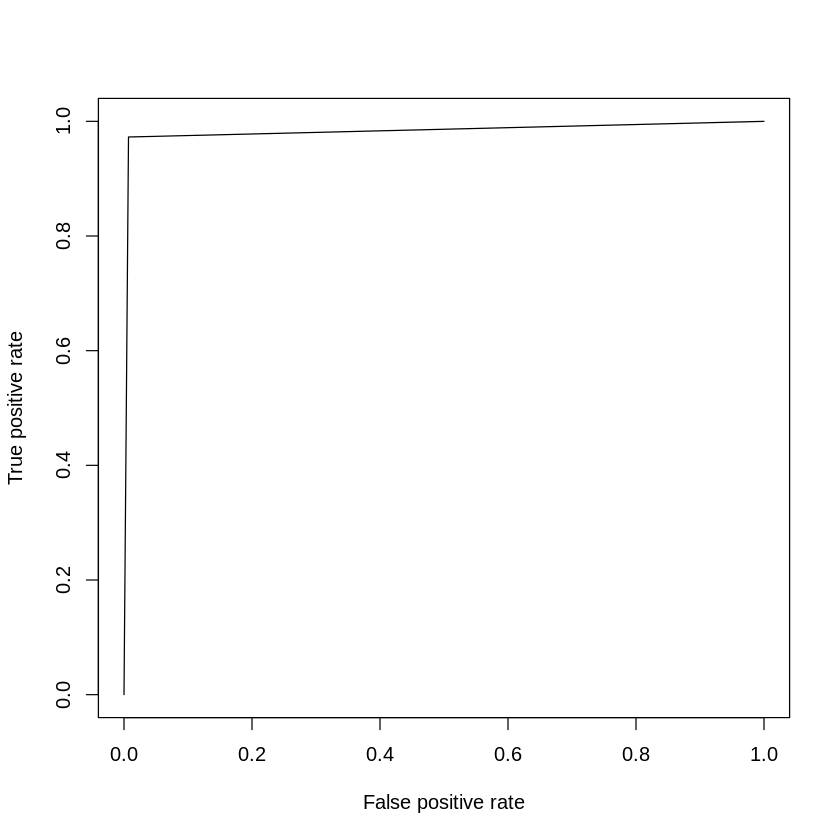

In [19]:
pred1 <- prediction(as.numeric(pred_valid), as.numeric(test_df$Barra_Perdida))
perf1 <- performance(pred1, "tpr", "fpr")
plot(perf1)

5. Finalmente veamos aquí otra manera de tener más detalle sobre la Matriz de confusión a traves de la función con el mismo nombre, para ello, necesitaremos de los paquetes de "caret y e1071" y la librería "caret". Como verán obtendremos números importantes para tomar la decisión de con qué modelo quedarnos.

In [27]:
install.packages("caret")
library (caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [33]:
install.packages("e1071", dep = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’




In [41]:
confusionMatrix(pred_valid, test_df$Barra_Perdida)

Confusion Matrix and Statistics

            Reference
Prediction   NoReventon Reventon
  NoReventon       2680       63
  Reventon           19     2243
                                          
               Accuracy : 0.9836          
                 95% CI : (0.9797, 0.9869)
    No Information Rate : 0.5393          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.967           
                                          
 Mcnemar's Test P-Value : 2.049e-06       
                                          
            Sensitivity : 0.9930          
            Specificity : 0.9727          
         Pos Pred Value : 0.9770          
         Neg Pred Value : 0.9916          
             Prevalence : 0.5393          
         Detection Rate : 0.5355          
   Detection Prevalence : 0.5481          
      Balanced Accuracy : 0.9828          
                                          
       'Positive' Class : NoR

# **k-NN Classifier (K-Vecinos Cercanos)**

1. Instalaremos el paquete class y usaremos su librería con el mismo nombre

In [35]:
install.packages("class")
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2. Ahora sembraremos semillas (ya visto en sesiones pasadas)
3. Usamos la función knn del paquete de class, tomando nuestra data de entrenamiento (excepto la columna que representa la variable a predecir, toda nuestra data de validación (excepto la columna que representa la variable a predecir) y finalmente tomando como valor k=10 (recuerden que este valor es variable)
4. Obtenemos la matriz de confusión para ver la calidad de la predicción

In [36]:
library(class)
set.seed(1234)
pred_valid_knn <- knn(train_df[, -9], 
                      test_df[, -9], 
                      cl = train_df[, 9],
                      k = 10)

In [37]:
matrizConfusion <- table(test_df$Barra_Perdida, pred_valid_knn)
matrizConfusion

            pred_valid_knn
             NoReventon Reventon
  NoReventon       2683       16
  Reventon           64     2242

5. Y de manera similar a como se hizo para el Algoritmo de RL, también obtenemos la gráfica de curva ROC

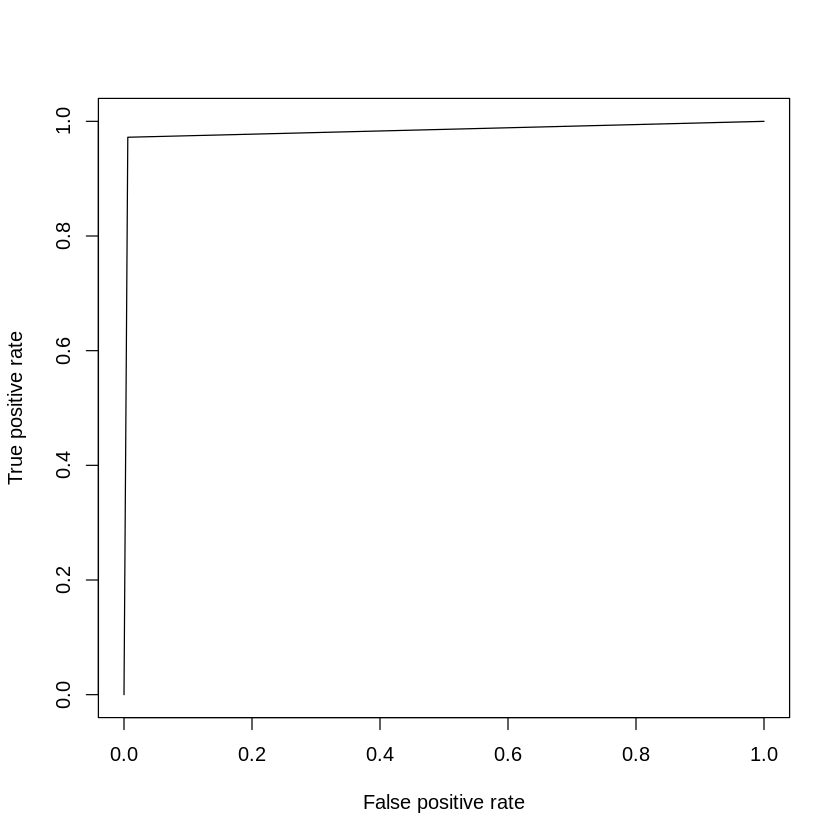

In [38]:
library(ROCR)
pred1 <- prediction(as.numeric(pred_valid_knn), as.numeric(test_df$Barra_Perdida))
perf1 <- performance(pred1, "tpr", "fpr")
plot(perf1)

6. Ahora la matriz de confusión más detallada:

In [39]:
install.packages("caret")
install.packages("e1071", dep = TRUE) 
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
confusionMatrix(pred_valid_knn, test_df$Barra_Perdida)

Confusion Matrix and Statistics

            Reference
Prediction   NoReventon Reventon
  NoReventon       2683       64
  Reventon           16     2242
                                          
               Accuracy : 0.984           
                 95% CI : (0.9801, 0.9873)
    No Information Rate : 0.5393          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9678          
                                          
 Mcnemar's Test P-Value : 1.482e-07       
                                          
            Sensitivity : 0.9941          
            Specificity : 0.9722          
         Pos Pred Value : 0.9767          
         Neg Pred Value : 0.9929          
             Prevalence : 0.5393          
         Detection Rate : 0.5361          
   Detection Prevalence : 0.5489          
      Balanced Accuracy : 0.9832          
                                          
       'Positive' Class : NoR

# **Árbol de Decisión**

1. Instalamos el paquete rpart y usaremos la librería con el mismo nombre

In [44]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2. nuevamente sembramos una semilla
3. utilizamos la función rpart para crear el árbol de decisión, tomando a consideración que lo que se intenta predecir es la variable Barra_Perdida a partir de la data de entrenamiento "train_df"

In [45]:
library(rpart)
set.seed(1234)
clasificadorDT <- rpart(Barra_Perdida ~ ., data = train_df)

4. Ahora hagamos la predicción, utilizando la función "predict", a través de el algoritmo de Árboles de decisión (clasificadorDT) y nuestra data de entrenamiento "test_df", confirmando el type = class
5. Para finalmente obtener la Matriz de confusión para medir su calidad en la predicción

In [46]:
pred_valid_DT <- predict(clasificadorDT, newdata = test_df, type = 'class')

In [47]:
matrizConfusion <- table(test_df$Barra_Perdida, pred_valid_DT)
matrizConfusion

            pred_valid_DT
             NoReventon Reventon
  NoReventon       2678       21
  Reventon           55     2251

6. Finalmente como en los ejercicios anteriores, obtenemos la curva de ROC

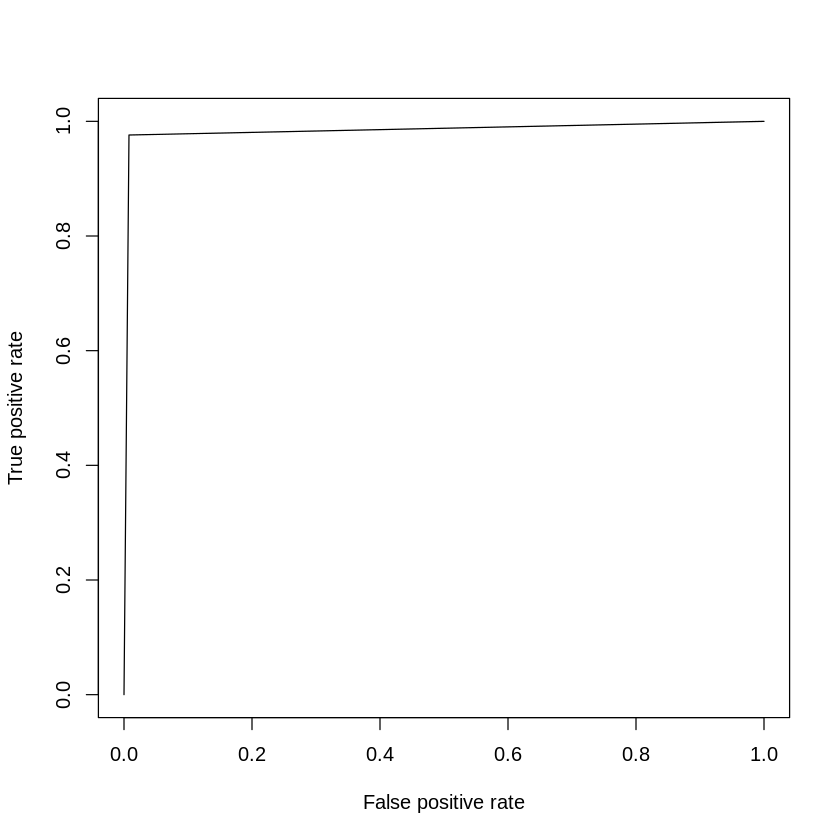

In [48]:
pred1 <- prediction(as.numeric(pred_valid_DT), as.numeric(test_df$Barra_Perdida))
perf1 <- performance(pred1, "tpr", "fpr")
plot(perf1)

7. Ahora veamos la Matriz de confusión a detalle:

In [49]:
install.packages("caret")
install.packages("e1071", dep = TRUE) 
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
confusionMatrix(pred_valid_DT, test_df$Barra_Perdida)

Confusion Matrix and Statistics

            Reference
Prediction   NoReventon Reventon
  NoReventon       2678       55
  Reventon           21     2251
                                        
               Accuracy : 0.9848        
                 95% CI : (0.981, 0.988)
    No Information Rate : 0.5393        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.9694        
                                        
 Mcnemar's Test P-Value : 0.0001535     
                                        
            Sensitivity : 0.9922        
            Specificity : 0.9761        
         Pos Pred Value : 0.9799        
         Neg Pred Value : 0.9908        
             Prevalence : 0.5393        
         Detection Rate : 0.5351        
   Detection Prevalence : 0.5461        
      Balanced Accuracy : 0.9842        
                                        
       'Positive' Class : NoReventon    
                          

# **Random Forest**

1. Descargamos el paquete "randomForest" y utilizaremos la librería con el mismo nombre

In [51]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




2. Nuevamente hacemos un set.seed, recuerden esto siempre, pues estamos trabajando con random
3. utilizamos la función "randomForest" para predecir la variable "Barra Perdida, a partir del conjunto de entrenamiento "train_df" y considerando que tendremos un número de árboles (ntree) = 250 (recuerden que este número es variable, es un parámetro que podemos mejorar)

In [52]:
set.seed(1234)
clasificadorRF <- randomForest(Barra_Perdida ~ ., data = train_df, ntree = 250)

4. Una vez que ya tengamos lo anterior, ahora podemos hacer la predicción utilizando la función de "predict" a partir del clasificador de Random Forest "clasificadorRF" y la data correspondiente a la validación "test_df"
5. Obtenemos la matriz de confusión como en los ejercicios anteriores
6. Y finalmente la curva de ROC como ya lo hemos venido haciendo.

In [53]:
pred_valid_RF <- predict(clasificadorRF, newdata = test_df)

In [54]:
matrizConfusion <- table(test_df$Barra_Perdida, pred_valid_RF)
matrizConfusion

            pred_valid_RF
             NoReventon Reventon
  NoReventon       2680       19
  Reventon           50     2256

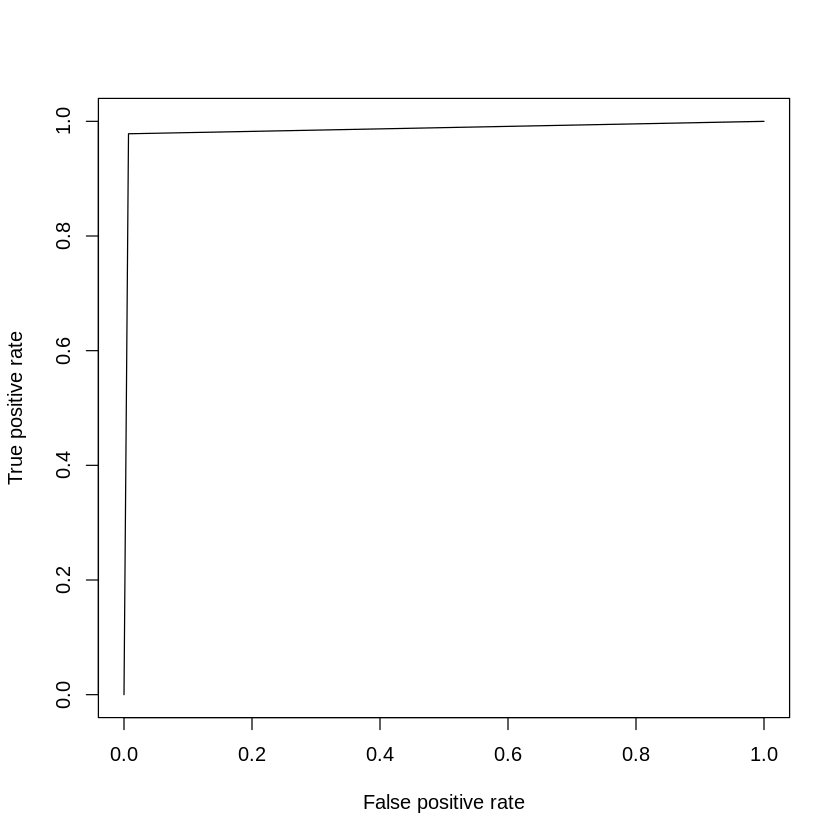

In [55]:
pred1 <- prediction(as.numeric(pred_valid_RF), as.numeric(test_df$Barra_Perdida))
perf1 <- performance(pred1, "tpr", "fpr")
plot(perf1)

7. Obtengamos la matriz de Confusión más a detalle:

In [ ]:
install.packages("caret")
install.packages("e1071", dep = TRUE) 
library(caret)

In [56]:
confusionMatrix(pred_valid_RF, test_df$Barra_Perdida)

Confusion Matrix and Statistics

            Reference
Prediction   NoReventon Reventon
  NoReventon       2680       50
  Reventon           19     2256
                                          
               Accuracy : 0.9862          
                 95% CI : (0.9826, 0.9893)
    No Information Rate : 0.5393          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9722          
                                          
 Mcnemar's Test P-Value : 0.0003043       
                                          
            Sensitivity : 0.9930          
            Specificity : 0.9783          
         Pos Pred Value : 0.9817          
         Neg Pred Value : 0.9916          
             Prevalence : 0.5393          
         Detection Rate : 0.5355          
   Detection Prevalence : 0.5455          
      Balanced Accuracy : 0.9856          
                                          
       'Positive' Class : NoR